# Import Package

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Import Data

In [2]:
df = pd.read_csv('Telco Customer Churn.csv')
#overview dari dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Initial EDA

In [3]:
df.shape

(7043, 21)

In [4]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical information on numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#looping through the column to get unique values per column 
for i in df.columns:
    print(f"unique {i}'s count:{df[i].nunique()}")
    print(f"{df[i].unique()}\n")

unique customerID's count:7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

unique gender's count:2
['Female' 'Male']

unique SeniorCitizen's count:2
[0 1]

unique Partner's count:2
['Yes' 'No']

unique Dependents's count:2
['No' 'Yes']

unique tenure's count:73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

unique PhoneService's count:2
['No' 'Yes']

unique MultipleLines's count:3
['No phone service' 'No' 'Yes']

unique InternetService's count:3
['DSL' 'Fiber optic' 'No']

unique OnlineSecurity's count:3
['No' 'Yes' 'No internet service']

unique OnlineBackup's count:3
['Yes' 'No' 'No internet service']

unique DeviceProtection's count:3
['No' 'Yes' 'No internet service']

unique TechSupport's count:3
['No' 'Yes' 'No internet service']

unique StreamingTV's count:3
['No

In [7]:
# changing the data type of "TotalCharges" and "tenure" to float.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def feature_to_float(feature_list,df):
    for i in feature_list:
        df[i] = df[i].astype(float)
    return df

feature_to_float(['tenure'],df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [8]:
#renaming the data values of "PaymentMethod" for better readability
payment_column = {'Electronic Check': 'E-Check', 'Mailed Check': 'Mailed Check', 'Bank Transfer (automatic)': 'Bank Transfer', 'Credit Card (automatic)': 'Credit Card'}
df["PaymentMethod"].replace(payment_column, inplace=True)

In [10]:
#counting number of missing value
print(df.isnull().any())
print("\n# nilai kosong pada 'TotalCharges` adalah ",df["TotalCharges"].isnull().sum())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

# nilai kosong pada 'TotalCharges` adalah  11


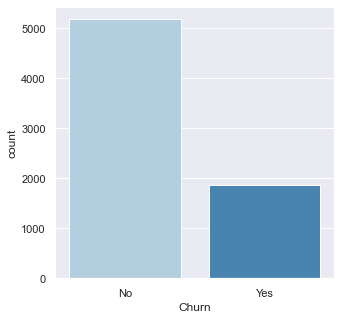

In [11]:
#display a frequency distribution for churn
plt.figure(figsize=(5,5))
ax= sns.countplot(x=df['Churn'], palette="Blues", linewidth=1)
plt.show()

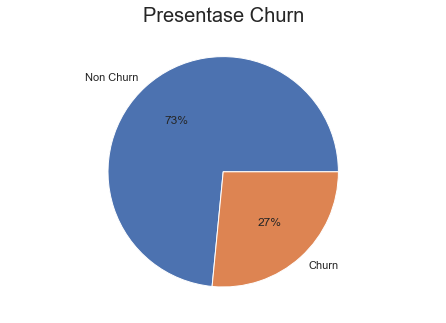

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Non Churn','Churn']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Presentase Churn", fontsize=20)
plt.show()

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.

In [13]:
#create function to generate boxplot
plots= {1:[111], 2:[121,122], 3:[131,132,133], 4:[221,222,223,224], 5:[231,232,233,234,235], 6:[231,232,233,234,235,236]}

def boxplot(x,y,df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x,j]],palette="Blues", linewidth=1)
        ax.set_title(j)
    return plt.show()

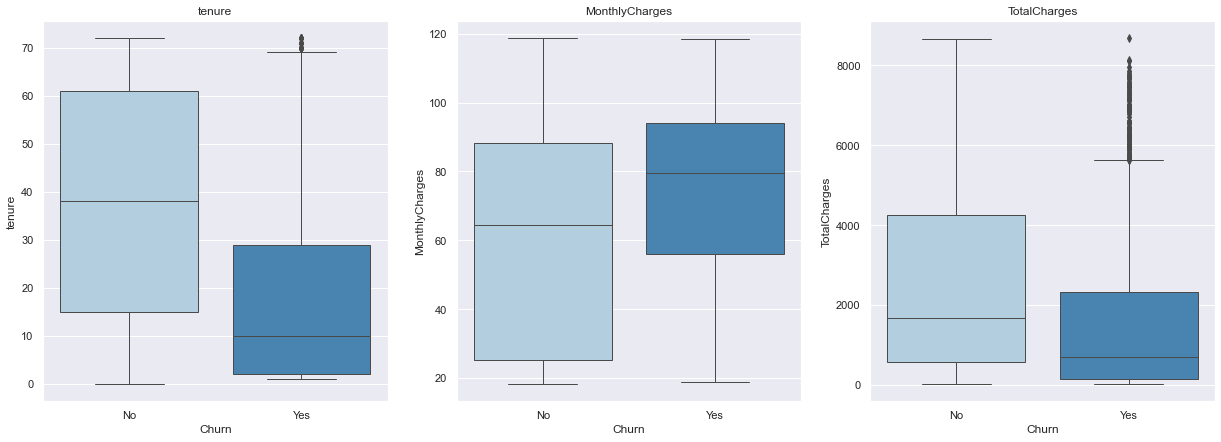

In [14]:
#generate boxplot for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure","MonthlyCharges","TotalCharges"], df)

Plot insights:
- Churning customers have much lower tenure with a median of ca. 10 months compared to a median of non-churners of ca. 38 months.
- Churning customers have higher monthly charges with a median of ca. 80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD).
- TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

In [15]:
#create a function to generate countplot
def countplot(x,y,df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

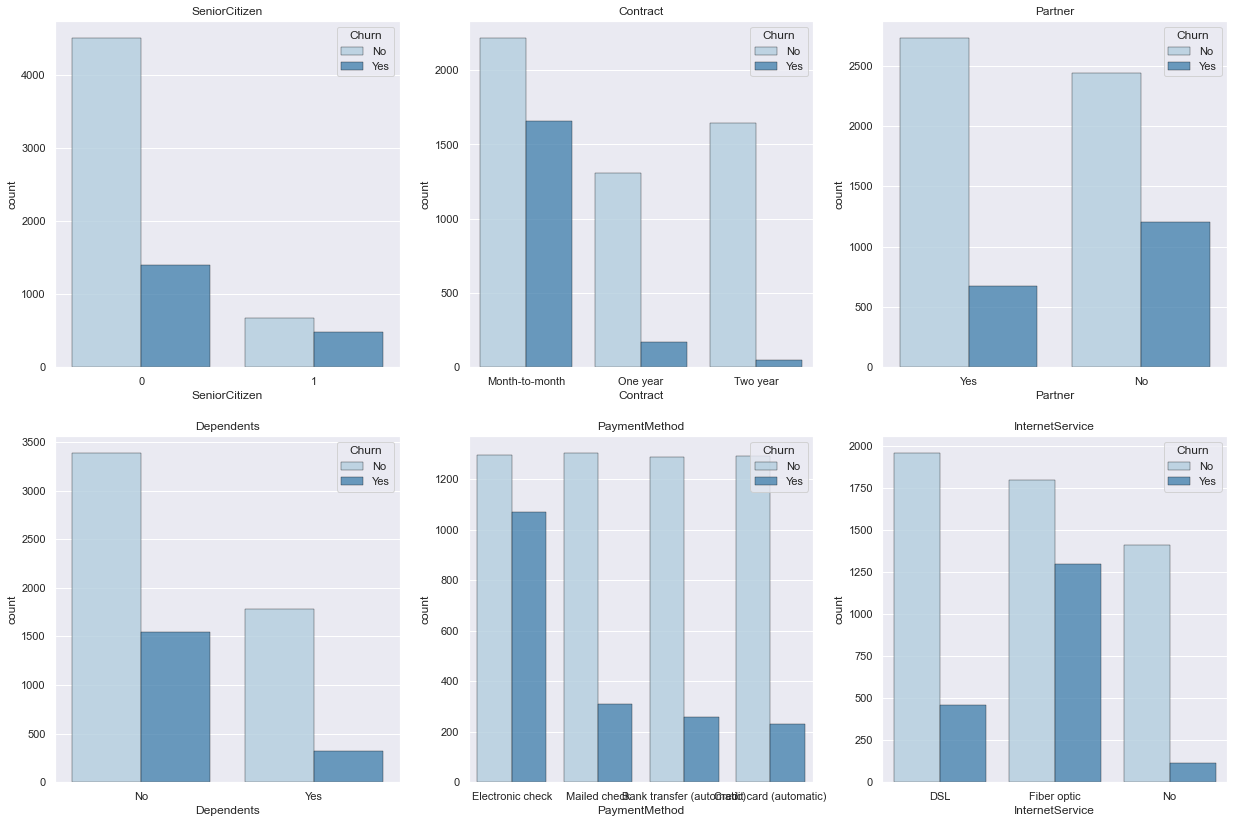

In [16]:
#generate countplots for various features
countplot("Churn", ['SeniorCitizen','Contract','Partner','Dependents','PaymentMethod','InternetService'], df)

Plot insights:
- Senior citizens churn rate is much higher than non-senior churn rate.
- Churn rate for month-to-month contracts much higher that for other contract durations.
- Moderately higher churn rate for customers without partners.
- Much higher churn rate for customers without children.
- Payment method electronic check shows much higher churn rate than other payment methods.
- Customers with InternetService fiber optic as part of their contract have much higher churn rate.

# Check Outliers

In [17]:
#Check outliers by applying the IQR method checking if value are way outside the IQR borders.
numerical_feature = ["tenure","MonthlyCharges","TotalCharges"]
df_num = df[numerical_feature]
df_num.describe()

Q1= df_num.quantile(0.25)
Q3= df_num.quantile(0.75)
IQR= Q3-Q1
IQR
((df_num < (Q1 - 1.5*IQR)) | (df_num>(Q3+1.5*IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

<AxesSubplot:ylabel='tenure'>

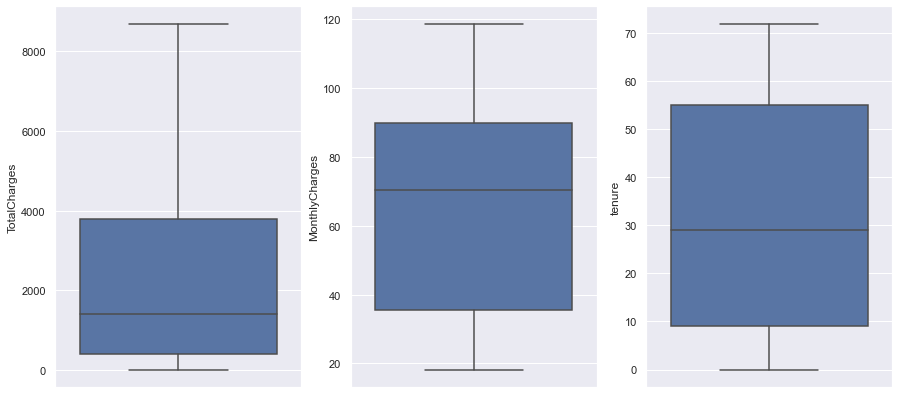

In [18]:
f, axes = plt.subplots(1, 3,figsize=(15,7))
sns.boxplot(y= "TotalCharges", data=df, ax=axes[0])
sns.boxplot(y= "MonthlyCharges", data=df , ax=axes[1])
sns.boxplot(y= "tenure", data=df , ax=axes[2])

No outliers in numerical features detected with the IQR method — no adjustments made.

# Drop Column

In [19]:
#delete 'CustomerID' column because that unnecessary
del df["customerID"]

# Feature Engineering

### Feature Selection

In [21]:
#Generate new feature "Number_AdditionalServices" by summing up the number of add-on sevices consumed.
df['Number_AdditionalServices'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

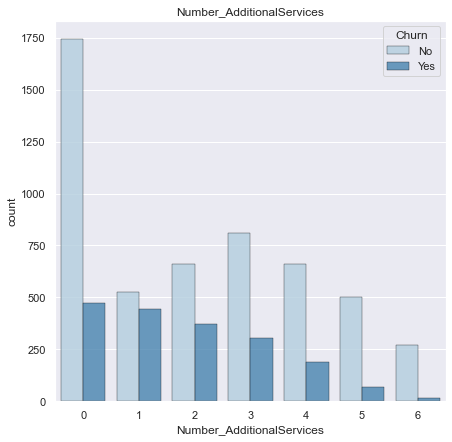

In [22]:
#Generate countplot for the new feature
countplot('Churn', ['Number_AdditionalServices'], df)

Plot insights:
- The countplot shows a very high churn rate for customers that have 1 additional service.
- Customers with a very high number of additional services do have a low churn rate.

### Label Encoding

In [23]:
#label encoding for identified columns
feature_le = ['gender','Partner','Dependents','Churn','PhoneService','PaperlessBilling']

def label_encoding(features,df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return

label_encoding(['Partner','Dependents','Churn','PhoneService','PaperlessBilling'], df)
df['gender'] = df['gender'].map({'Female':1, 'Male':0})

### One Hot Encoding

In [24]:
#One Hot Encoding for identified columns.
feature_ohe = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Number_AdditionalServices']

df = pd.get_dummies(df,columns=feature_ohe)

### Feature Scaling: Min Max Scaling

In [25]:
#Min max scaling for identified columns
from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure','MonthlyCharges','TotalCharges']
df_features_mms = pd.DataFrame(df, columns=features_mms)
df_remaining_features = df.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df= pd.concat([df_remaining_features, df_rescaled_features], axis=1)

# Correlation Analysis

<AxesSubplot:>

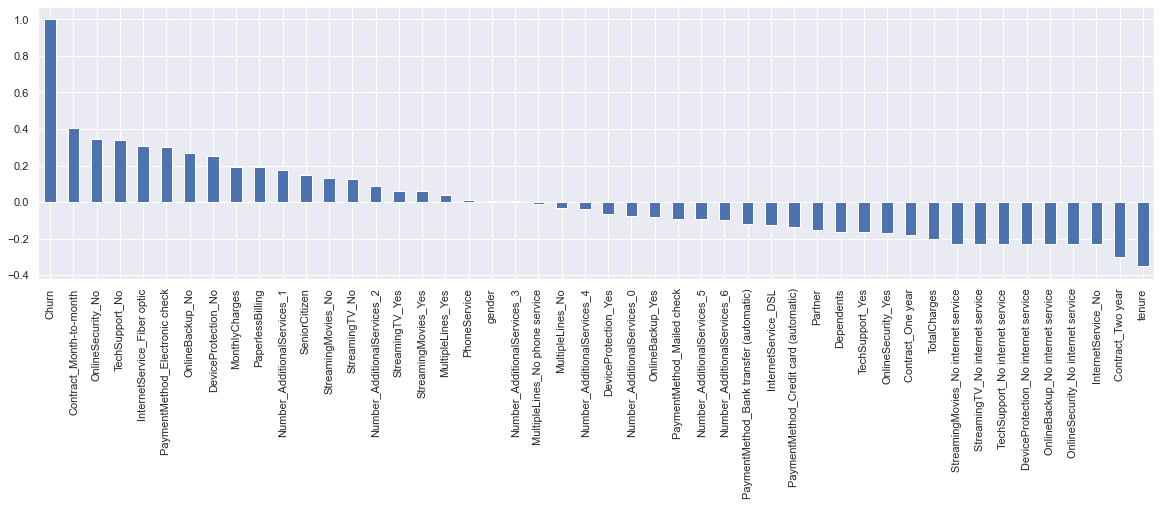

In [26]:
#show correlation plot for correlation of Churn with each of the remaining features.
plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

INSIGHT:
- Contract duration month-to-month is the biggest driver of churn.
- High tenure ranks as the strongest factor for not churning and the strongest feature overall. This is also supported by the boxplot in the EDA step. 